Linear Regression- 6/01/2024

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
datafile=pd.DataFrame()
datafile[0]=np.arange(2000,2021)
datafile[1]=[59,58,60,61,56,71,61,32,51,72,45,55,40,47,48,54,69,73,81,98,99]
datafile.columns=['Year','Placement']
datafile

,Year,Placement
0,2000,59
1,2001,58
2,2002,60
3,2003,61
4,2004,56
5,2005,71
6,2006,61
7,2007,32
8,2008,51
9,2009,72


<ipython-input-6-61ee01899832>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


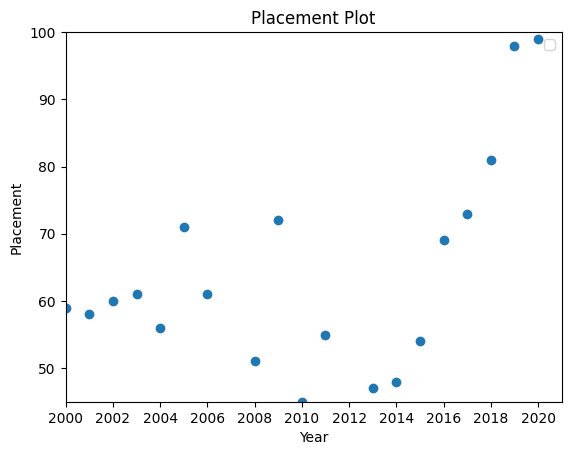

In [6]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement Plot")
plt.xlim(2000,2021)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2021,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

<Axes: >

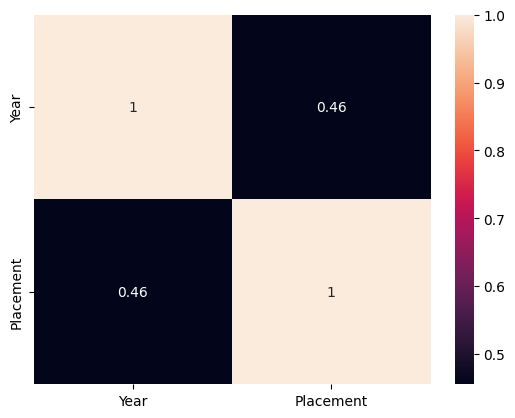

In [7]:
import seaborn as sb
data_corr=datafile.corr()
sb.heatmap(data_corr,annot=True)

In [8]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
train_x=np.asanyarray(datafile[['Year']])
train_y=np.asanyarray(datafile[['Placement']])
print(train_x)
print(train_y)
regress.fit(train_x,train_y)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)


[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]]
[[59]
 [58]
 [60]
 [61]
 [56]
 [71]
 [61]
 [32]
 [51]
 [72]
 [45]
 [55]
 [40]
 [47]
 [48]
 [54]
 [69]
 [73]
 [81]
 [98]
 [99]]
Coefficients: [[1.24545455]]
Intercept: [-2441.93506494]


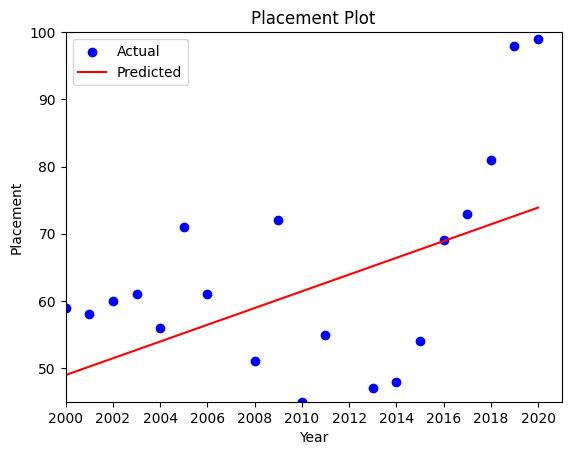

In [9]:
plt.scatter(datafile.Year,datafile.Placement,   color='blue',label="Actual")
plt.plot(train_x,regress.coef_[0][0]*train_x+regress.intercept_[0],'-r',label="Predicted")
plt.title("Placement Plot")
plt.xlim(2000,2021)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2021,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [11]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted']=y_predicted

print(datafile.head())
datafile.to_csv(r"C:\Users\DR.Noor Mahammad SK\Downloads\Placement.csv")

[59] [48.97402597]
[58] [50.21948052]
[60] [51.46493506]
[61] [52.71038961]
[56] [53.95584416]
[71] [55.2012987]
[61] [56.44675325]
[32] [57.69220779]
[51] [58.93766234]
[72] [60.18311688]
[45] [61.42857143]
[55] [62.67402597]
[40] [63.91948052]
[47] [65.16493506]
[48] [66.41038961]
[54] [67.65584416]
[69] [68.9012987]
[73] [70.14675325]
[81] [71.39220779]
[98] [72.63766234]
[99] [73.88311688]
   Year  Placement  Predicted
0  2000         59  48.974026
1  2001         58  50.219481
2  2002         60  51.464935
3  2003         61  52.710390
4  2004         56  53.955844


PERFORMANCE MEASUREMENT

In [12]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(train_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(train_y,y_predicted)))


Mean Absolute error  12.560296846011083
Mean Squared error  217.6548546691403
Root Mean Squared error  14.75313033458121


In [13]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(datafile[['Year']])
test_y=np.asanyarray(datafile[['Placement']])
test_y_predicted=regress.predict(test_x)
print('Mean Absolute error (MAE)', np.mean(np.absolute(test_y_predicted-test_y)))
print('Mean Squared error (MSE)', np.mean(test_y_predicted-test_y)**2)
print('R2 score:%0.2f ', r2_score(test_y,test_y_predicted))


Mean Absolute error (MAE) 12.560296846011083
Mean Squared error (MSE) 5.673971321934034e-26
R2 score:%0.2f  0.20717455554654518


In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(datafile[['Year']],datafile[['Placement']],test_size=0.30)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(train_x,train_y)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)



    Year
19  2019
1   2001
16  2016
18  2018
10  2010
6   2006
7   2007
9   2009
17  2017
12  2012
0   2000
14  2014
11  2011
8   2008
Testing
    Year
20  2020
5   2005
13  2013
15  2015
3   2003
4   2004
2   2002
Coefficients: [[1.47532792]]
Intercept: [-2906.10930668]


In [15]:
y_predicted=regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)


    Year
20  2020
5   2005
13  2013
15  2015
3   2003
4   2004
2   2002
    Placement
20         99
5          71
13         47
15         54
3          61
4          56
2          60
[[74.05309182]
 [51.92317302]
 [63.72579638]
 [66.67645222]
 [48.97251718]
 [50.4478451 ]
 [47.49718926]]


In [16]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(test_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(test_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(test_y,y_predicted)))


Mean Absolute error  14.786918889979527
Mean Squared error  251.21790064176005
Root Mean Squared error  15.849854909170622


In [17]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regress,datafile[['Year']],datafile[['Placement']],cv=5,scoring='r2')
print(accuracy)

[-168.42088574   -0.22419359   -1.0524908    -3.65797993  -11.4674242 ]
